# PLAN

0. [x] Get the data.
0. [x] Prepare the data for exploration.
0. [x] Split the data into train and test sets.
0. [ ] Explore the data.
0. [ ] Do cross-validation with the data.
0. [ ] Code and evaluate several models.
0. [ ] Evaluate out of sample data (test set).

# ENVIRONMENT

In [41]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [42]:
import os
import acquire
import prepare

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# conda install -c glemaitre imbalanced-learn
from imblearn.ensemble import BalancedBaggingClassifier

# ACQUISITION

In [43]:
# read in data from separate csvs
df1 = acquire.read_data('data01.csv')
df2 = acquire.read_data('data02.csv')
df3 = acquire.read_data('data03.csv')
df4 = acquire.read_data('data04.csv')
df5 = acquire.read_data('data05.csv')
df7 = acquire.read_data('data07.csv')

In [44]:
# list of dataframes before merge
dfs = [df1, df2, df3, df4, df5, df7]

In [45]:
# Specify columns to take from dataframes 1, 2, 3, 4, 5, and 7:


one_cols = ['CASEID',
            'ABUSED',
            'SCRSTATR',
            'LENGTHC1',
            'C1SITUAT',
            'PABUSE',
             ]


two_cols = ['CASEID',
            'D3RCHILT',
           ]

three_cols = ['CASEID',
              'E13PRGNT',
              'N7PREGNT',
              'TOTSUPRT'
             ]

four_cols = ['CASEID',
             'G1NUMBER', 
             'H1JEALUS', 
             'H2LIMIT',
             'H3KNOWNG',
             'J1HIT',
             'J2THROWN',
             'J3PUSH',
             'J4SLAP',
             'J5KICK',
             'J6OBJECT',
             'J7BEAT',
             'J8CHOKE',
             'J9KNIFE',
             'J10GUN',
             'J11SEX',
             'POWER',
             'HARASS',
            ]

five_cols = ['CASEID', 
             'B1AGE',
             'AGEDISP',
             'STDETAI',
            ]

seven_cols = ['CASEID',
              'SAMESEXR',
              'N11DRUGS',
              'N12ALCHL',
              'N13SUHIM',
              'N16CHILD',
              'N17ARRST',
              'N1FRQNCY',
              'N2SVRITY',
              'N3WEAPON',
              'N4CHOKE',
              'N5SEX',
              'N6CONTRL',
              'N8JEALUS',
              'N10CPBLE',
             ]

In [46]:
# drop dataframes down to desired features
df1 = df1[one_cols]
df2 = df2[two_cols]
df3 = df3[three_cols]
df4 = df4[four_cols]
df5 = df5[five_cols]
df7 = df7[seven_cols]

In [47]:
#establish congruent shapes for merge
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df7.shape)

(705, 6)
(705, 2)
(705, 4)
(705, 18)
(705, 4)
(705, 15)


In [48]:
# do the merges
dfa = df1.merge(right=df2, on='CASEID')
dfa = dfa.merge(right=df3, on='CASEID')
dfa = dfa.merge(right=df4, on='CASEID')
dfa = dfa.merge(right=df5, on='CASEID')
dfa = dfa.merge(right=df7, on='CASEID')

In [49]:
# establish merged shape
dfa.shape

(705, 44)

In [50]:
# look at unaltered value counts
prepare.value_counts(dfa)

CASEID

-------------------------------------------------------------

ABUSED
1    497
2    208
Name: ABUSED, dtype: int64

-------------------------------------------------------------

SCRSTATR
1      455
2      118
3      115
999     17
Name: SCRSTATR, dtype: int64

-------------------------------------------------------------

LENGTHC1
1    159
2    153
3     83
4    105
5    147
6     58
Name: LENGTHC1, dtype: int64

-------------------------------------------------------------

C1SITUAT
1    395
2     18
3     74
4     10
9    208
Name: C1SITUAT, dtype: int64

-------------------------------------------------------------

PABUSE
1    464
2     27
3      6
9    208
Name: PABUSE, dtype: int64

-------------------------------------------------------------

D3RCHILT
0      339
1      136
2      113
3       57
4       32
5        9
6        9
7        5
12       1
555      1
666      1
999      2
Name: D3RCHILT, dtype: int64

-----------------------------------------------------------

In [51]:
# change dfa to df to match conventions of prepare.py
df = dfa
# get repeated cases applied as a column
df['RECID'] = df.CASEID.apply(prepare.get_repeat_case)
#use prepare function to rename features 
prepare.rename_columns(df)

In [52]:
# ensure renaming of features worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 45 columns):
id                              705 non-null int64
abuse_past_year                 705 non-null int64
abuse_status                    705 non-null int64
length_relationship             705 non-null int64
partner_abusive                 705 non-null int64
num_abusers                     705 non-null int64
num_children                    705 non-null int64
pregnant                        705 non-null int64
beaten_while_pregnant           705 non-null int64
support_score                   705 non-null int64
guns_in_home                    705 non-null int64
jealous_past_year               705 non-null int64
limit_family_contact            705 non-null int64
location_tracking               705 non-null int64
threat_hit                      705 non-null int64
thrown_object                   705 non-null int64
push_shove                      705 non-null int64
slap                        

In [53]:
# run function to replace nonvalues and change values to conventionally boolean archetypes
prepare.replace_nonvals(df)

In [54]:
# check value counts to establish things worked
prepare.value_counts(df)

id

-------------------------------------------------------------

abuse_past_year
0    208
1    497
Name: abuse_past_year, dtype: int64

-------------------------------------------------------------

abuse_status
0    250
1    455
Name: abuse_status, dtype: int64

-------------------------------------------------------------

length_relationship
1    159
2    153
3     83
4    105
5    147
6     58
Name: length_relationship, dtype: int64

-------------------------------------------------------------

partner_abusive
0    300
1    405
Name: partner_abusive, dtype: int64

-------------------------------------------------------------

num_abusers
0    208
1    464
2     33
Name: num_abusers, dtype: int64

-------------------------------------------------------------

num_children
0      339
1      136
2      226
555      1
666      1
999      2
Name: num_children, dtype: int64

-------------------------------------------------------------

pregnant
0    631
1     74
Name: pregnant, dtype

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 45 columns):
id                              705 non-null int64
abuse_past_year                 705 non-null int64
abuse_status                    705 non-null int64
length_relationship             705 non-null int64
partner_abusive                 705 non-null int64
num_abusers                     705 non-null int64
num_children                    705 non-null int64
pregnant                        705 non-null int64
beaten_while_pregnant           705 non-null int64
support_score                   705 non-null int64
guns_in_home                    705 non-null int64
jealous_past_year               705 non-null int64
limit_family_contact            705 non-null int64
location_tracking               705 non-null int64
threat_hit                      705 non-null int64
thrown_object                   705 non-null int64
push_shove                      705 non-null int64
slap                        

In [56]:
# create list of features
features = [col for col in df]

In [57]:
# drop features from this list that are perceived as primary key or continuous variables
features.remove('id')
features.remove('length_relationship')
features.remove('power_scale')
features.remove('harass_scale')
features.remove('id_age')
features.remove('reassault')

In [58]:
# add the continuous variables into their own list
continuous_vars = ['length_relationship', 'power_scale', 'harass_scale', 'id_age']

In [59]:
len(features)

39

In [60]:
# split train and test
train_df, test_df = train_test_split(df, test_size=.15, random_state=123, stratify=df[['abuse_status']])

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


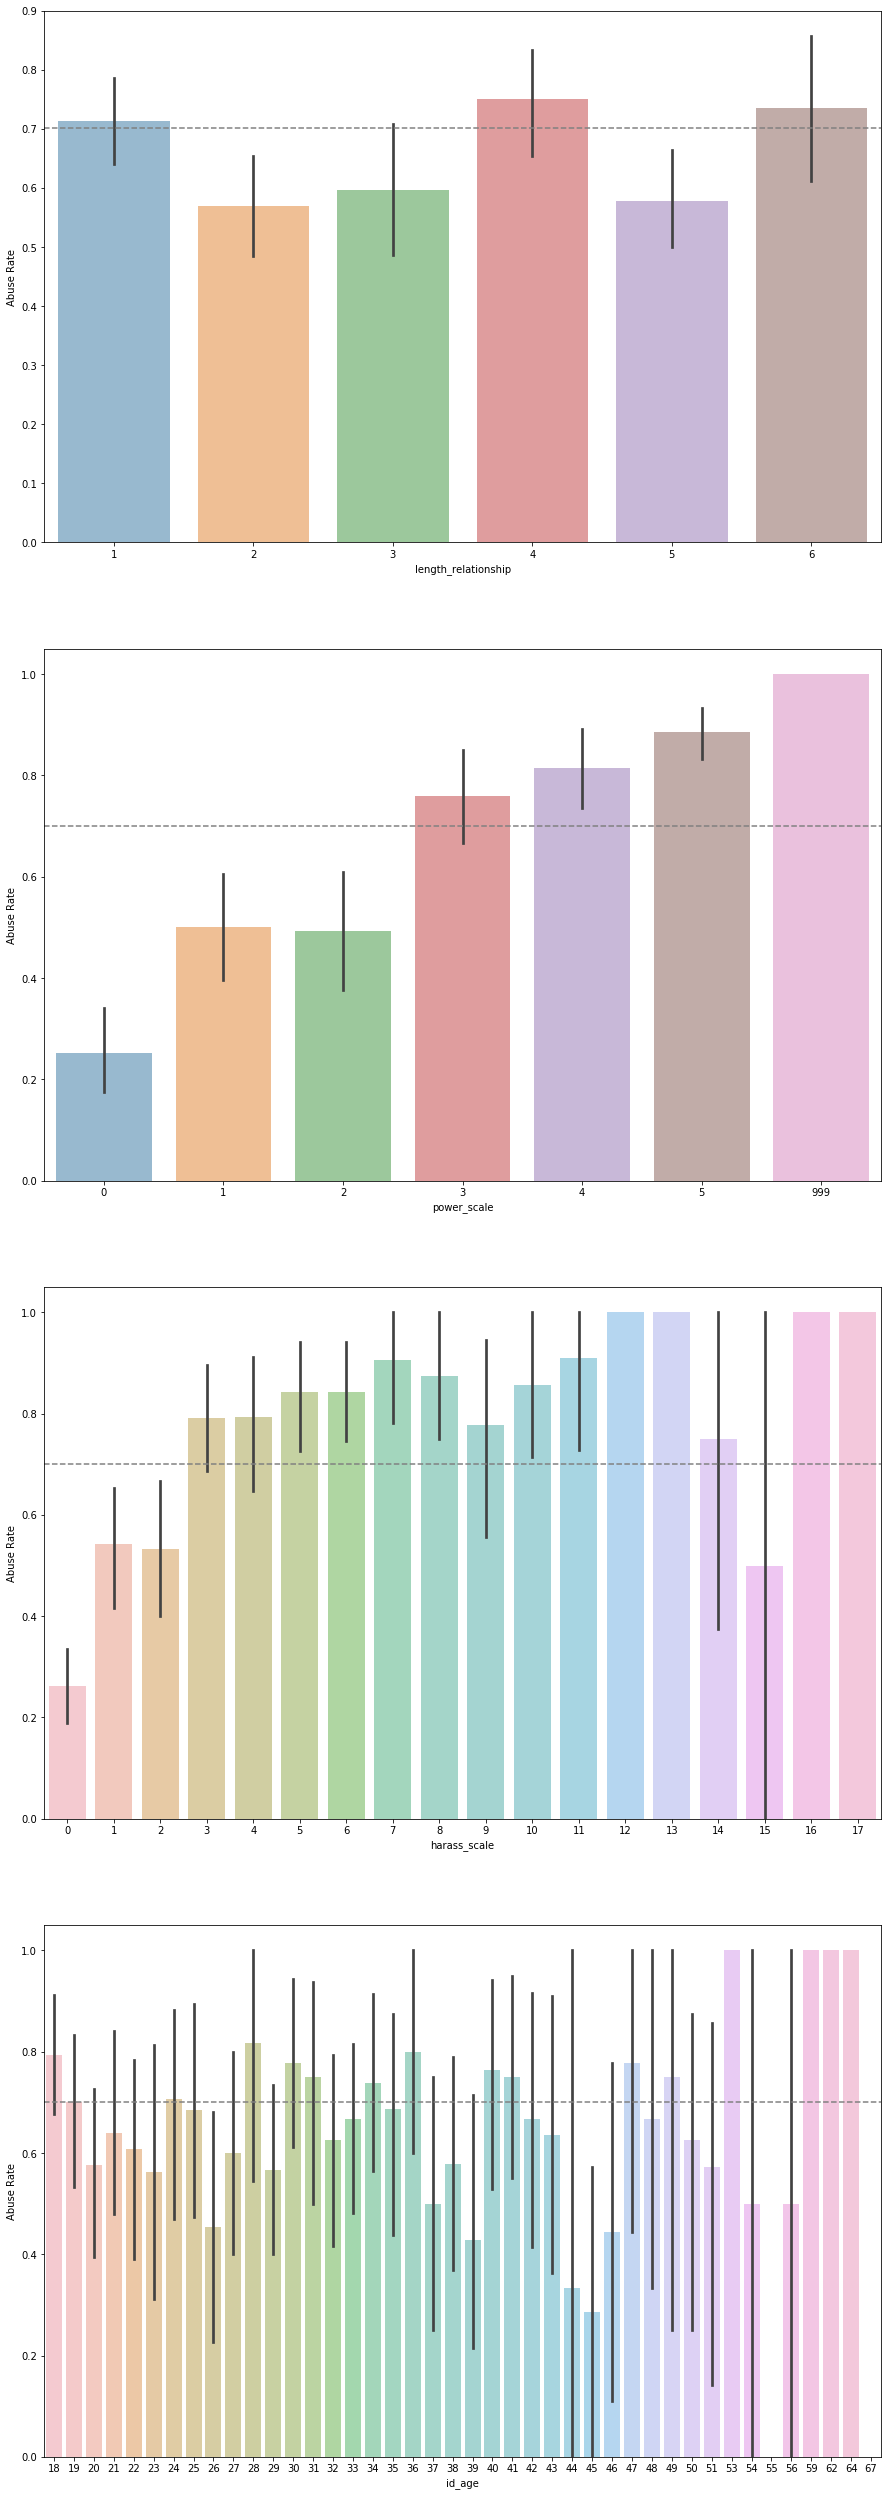

In [62]:
_, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 45))

abuse_rate = train_df.abuse_past_year.mean()

for i, feature in enumerate(continuous_vars):
    sns.barplot(feature, 'abuse_status', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Abuse Rate')
    ax[i].axhline(abuse_rate, ls='--', color='grey')

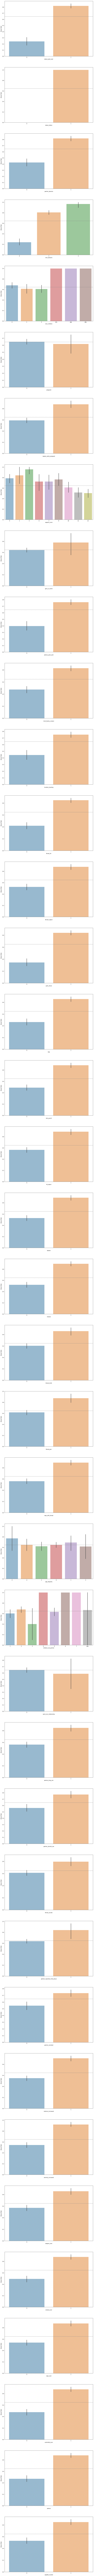

In [23]:
_, ax = plt.subplots(nrows=39, ncols=1, figsize=(15, 450))

abuse_rate = train_df.abuse_status.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'abuse_status', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Abuse Rate')
    ax[i].axhline(abuse_rate, ls='--', color='grey')

In [23]:
scaler = MinMaxScaler()

scaler.fit(train_df[continuous_vars])

train_df[continuous_vars] = scaler.transform(train_df[continuous_vars])
test_df[continuous_vars] = scaler.transform(test_df[continuous_vars])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launch

In [24]:
def swarrrm(df, cat, num_vars):
    '''creates a series of swarm plots from a dataframe using a categorical variable and a list of continuous ones'''
    for i, col in enumerate(num_vars):
        i = i+1
        plt.figure(figsize=(len(num_vars)*2, 14))
        plt.subplot(len(num_vars), 1, i)
        sns.swarmplot(data=df, x=cat, y=col)

In [25]:
continuous_vars

['length_relationship', 'power_scale', 'harass_scale', 'id_age']

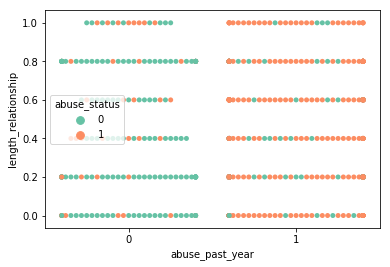

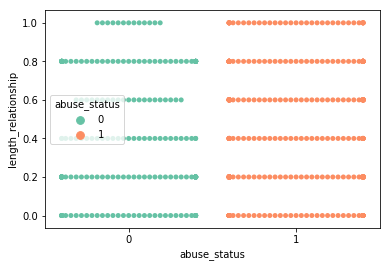

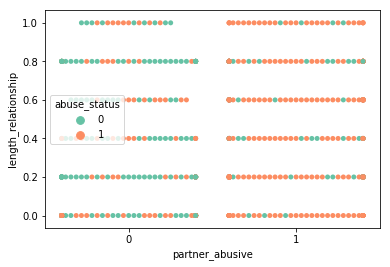

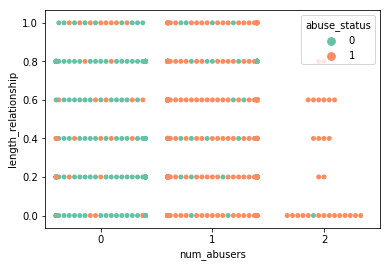

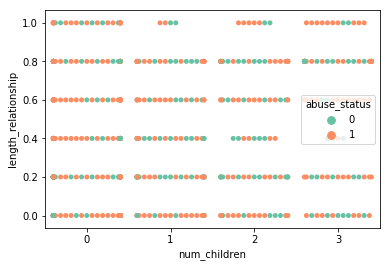

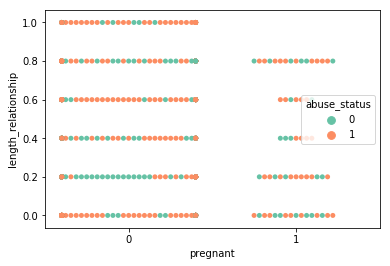

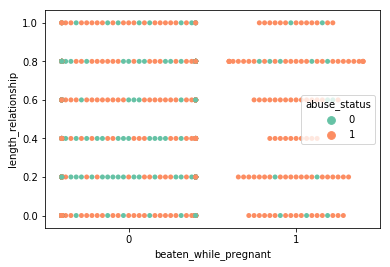

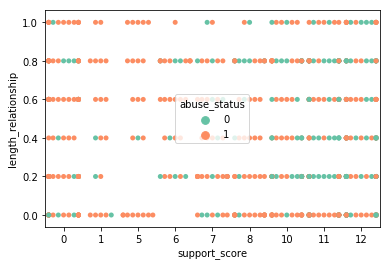

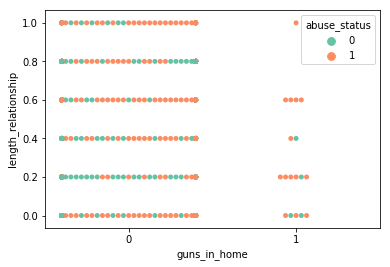

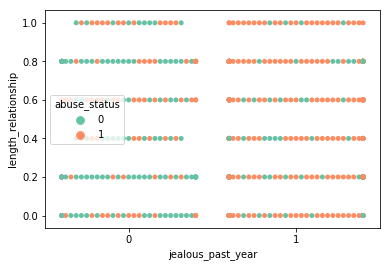

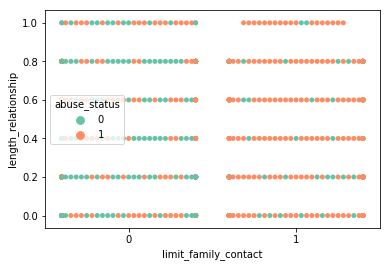

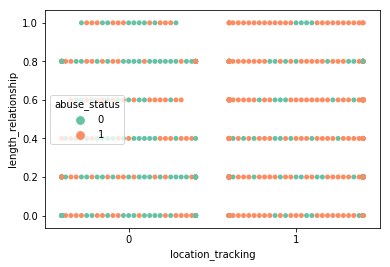

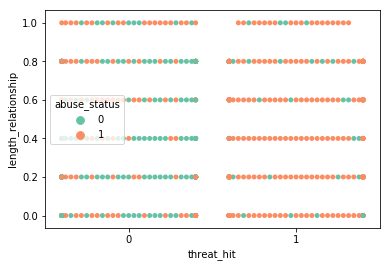

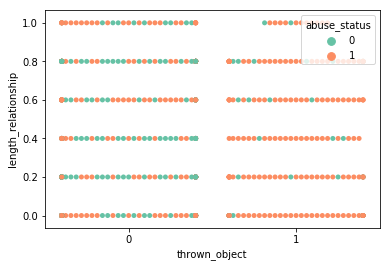

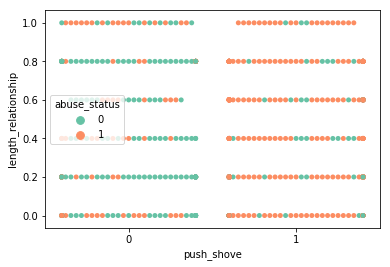

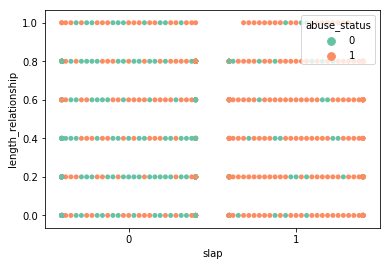

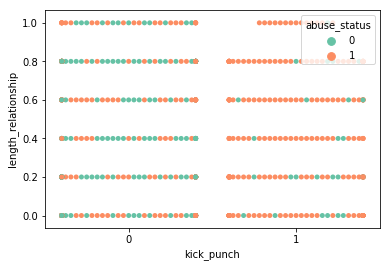

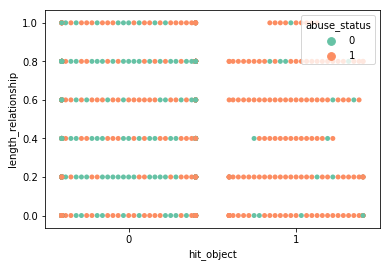

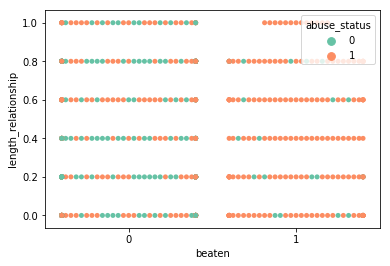

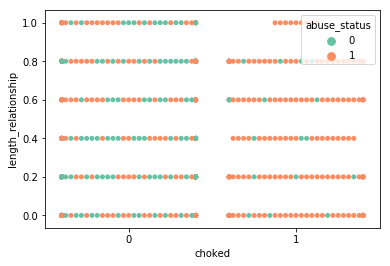

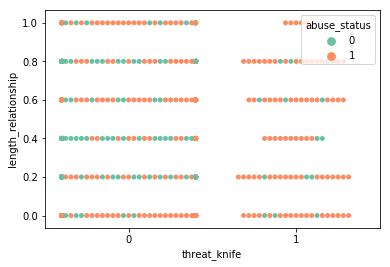

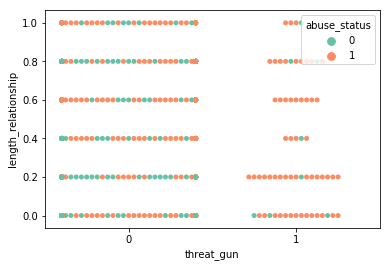

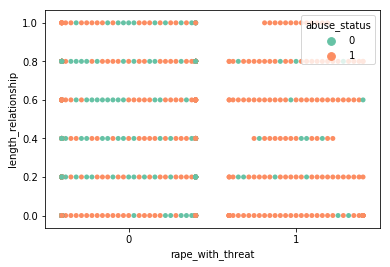

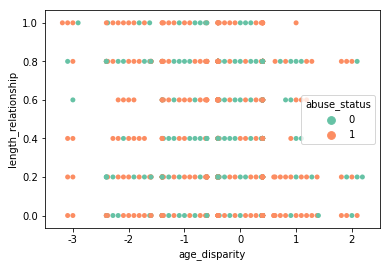

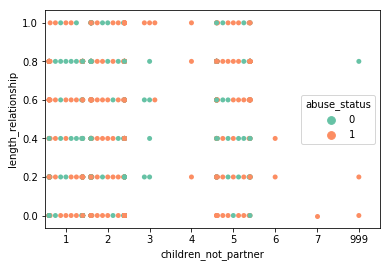

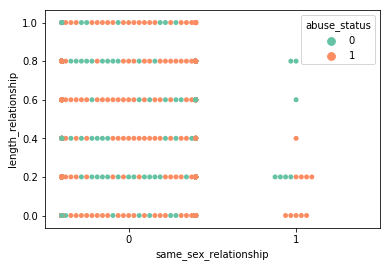

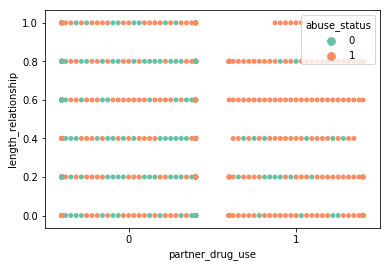

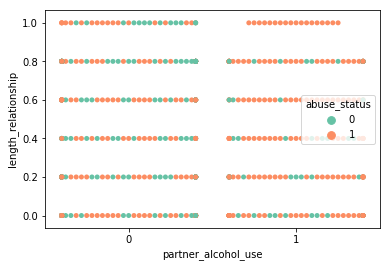

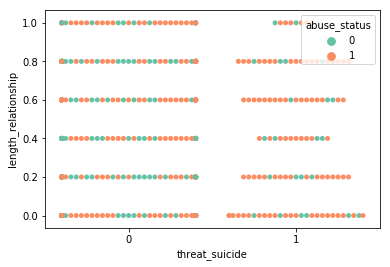

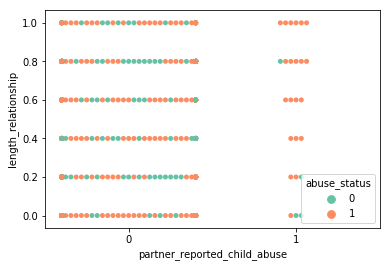

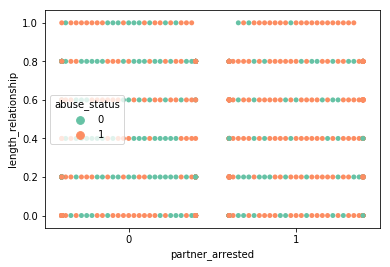

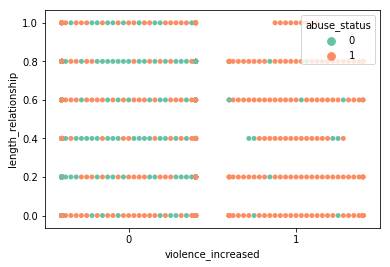

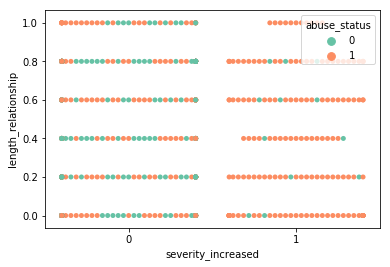

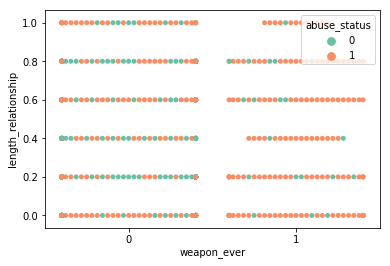

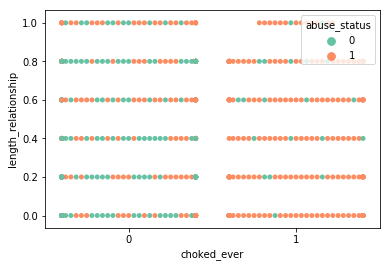

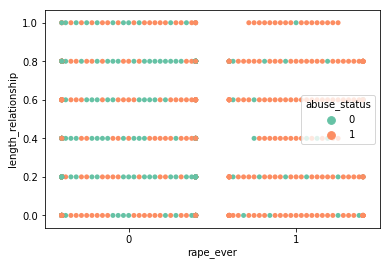

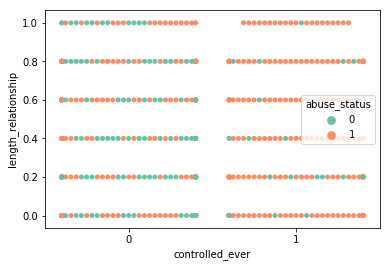

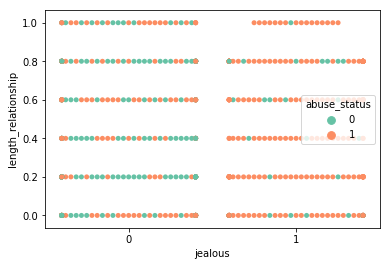

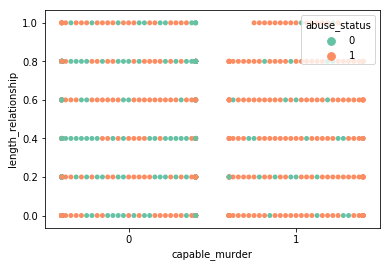

In [26]:
for col in features:
    sns.swarmplot(x=col, y="length_relationship", data=train_df, hue="abuse_status", palette="Set2")
    plt.show()

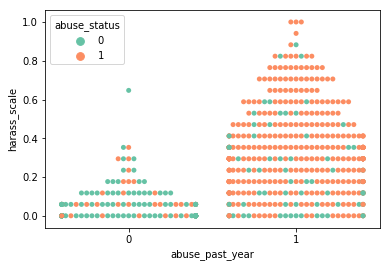

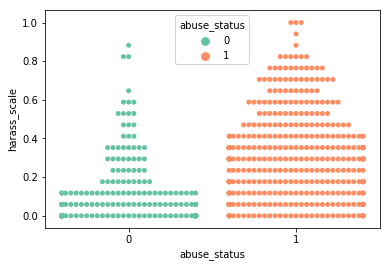

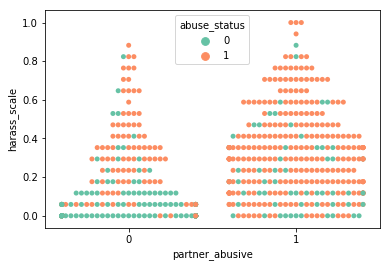

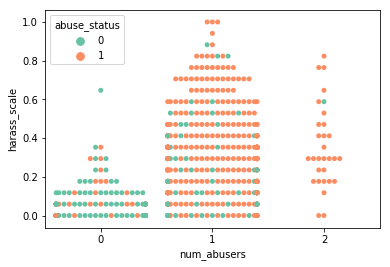

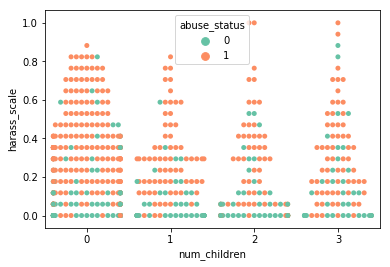

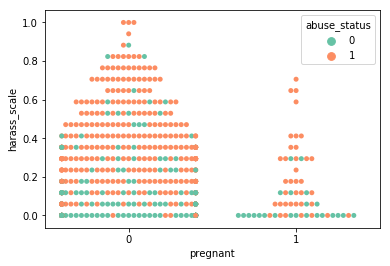

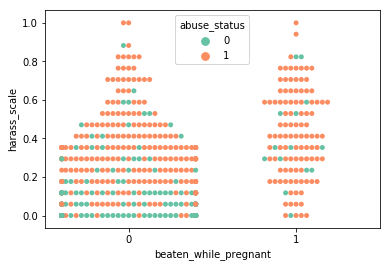

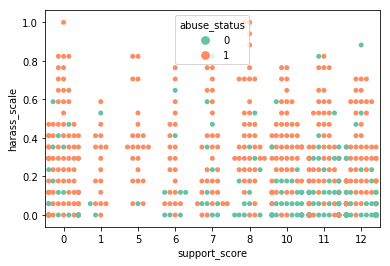

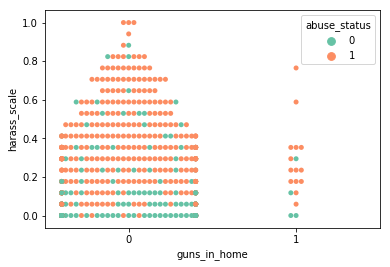

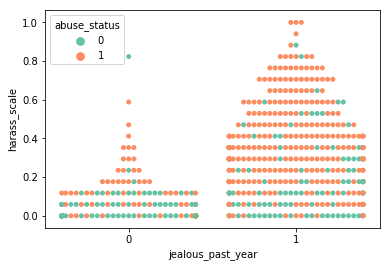

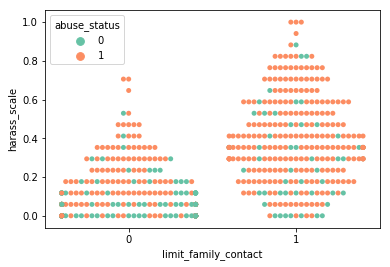

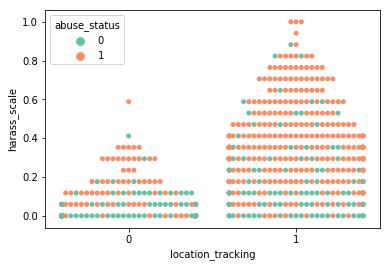

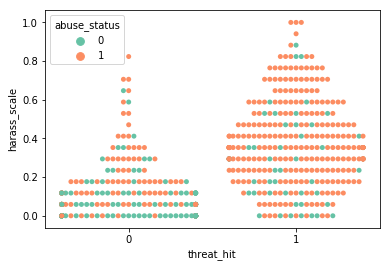

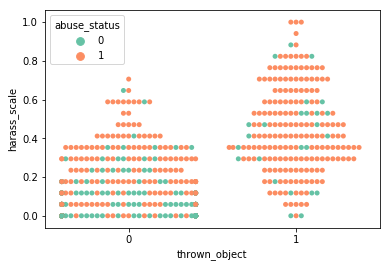

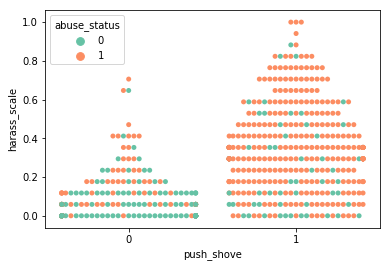

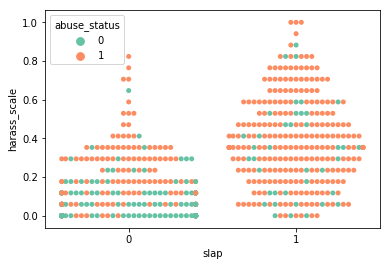

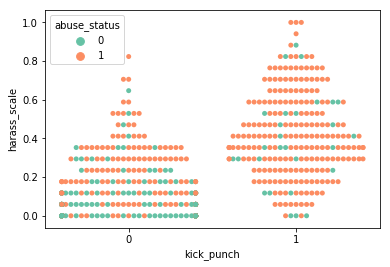

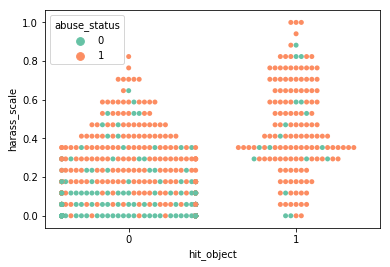

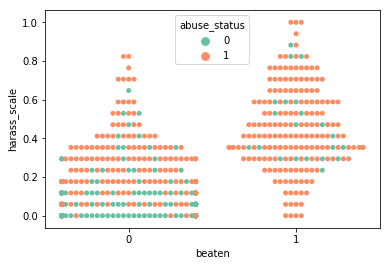

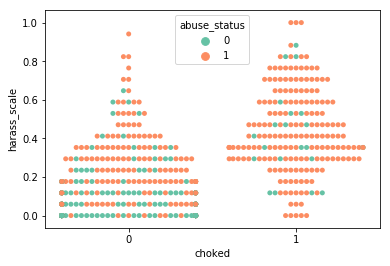

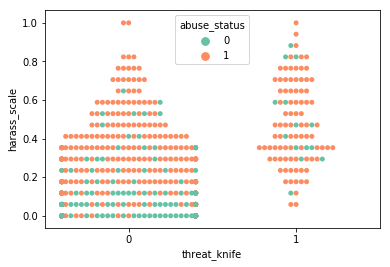

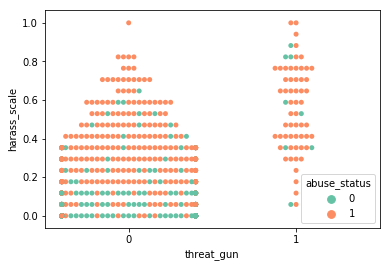

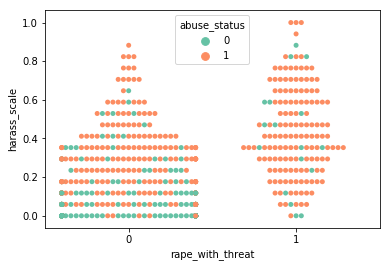

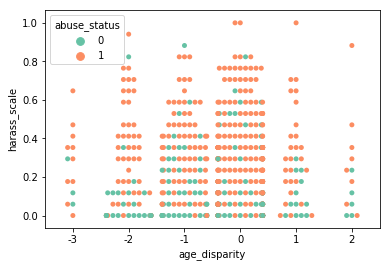

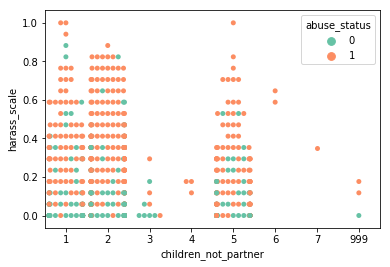

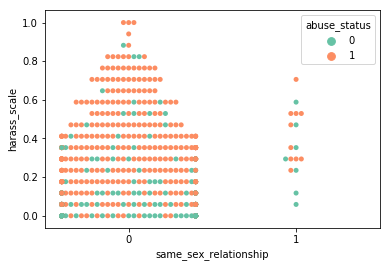

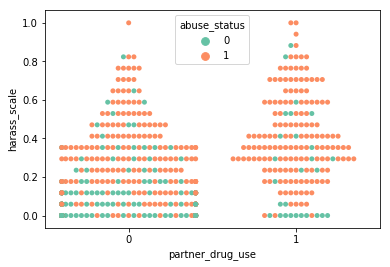

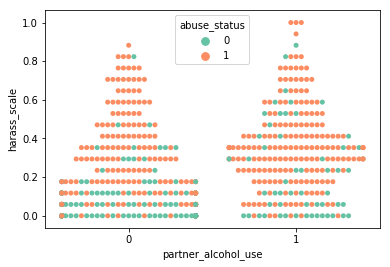

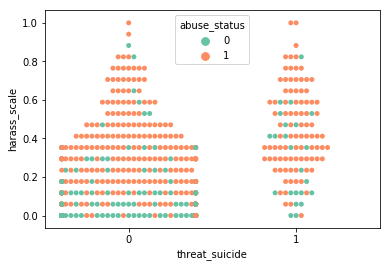

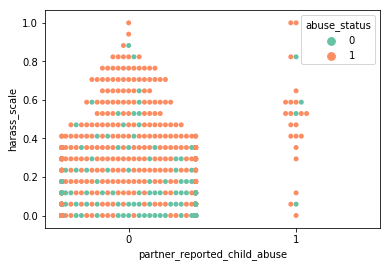

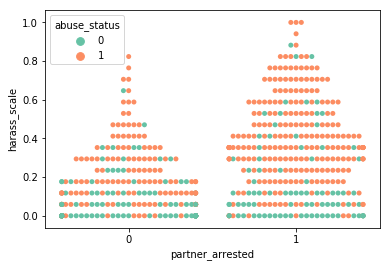

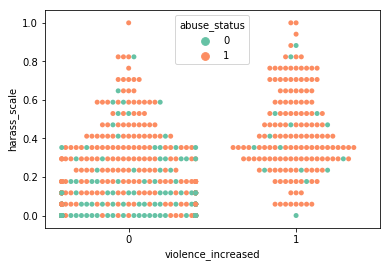

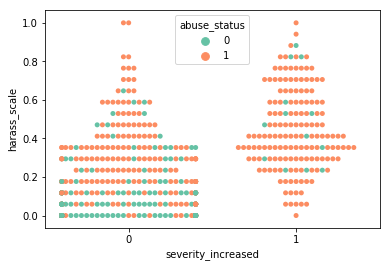

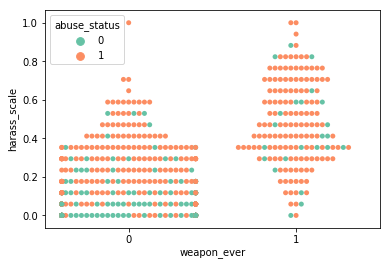

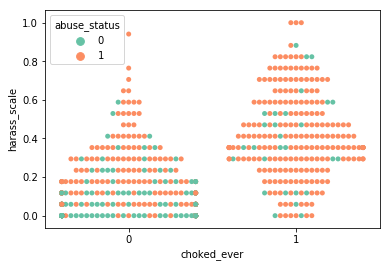

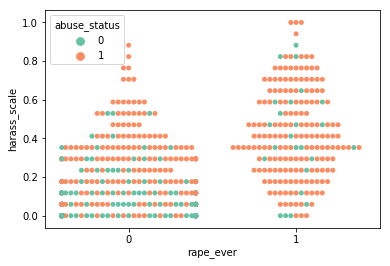

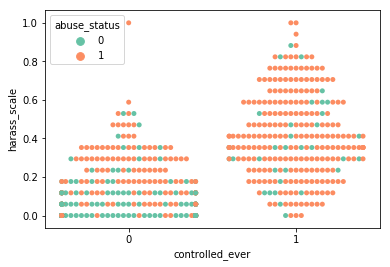

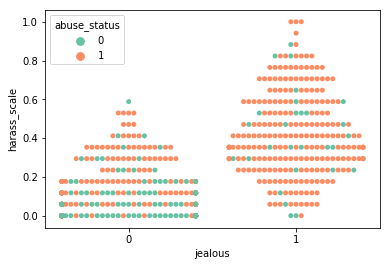

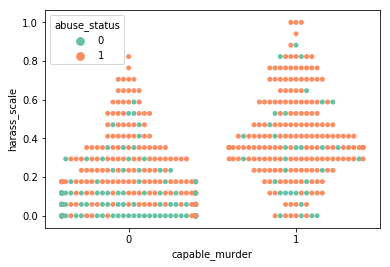

In [27]:
for col in features:
    sns.swarmplot(x=col, y="harass_scale", data=train_df, hue="abuse_status", palette="Set2")
    plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


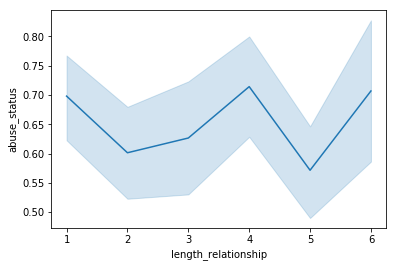

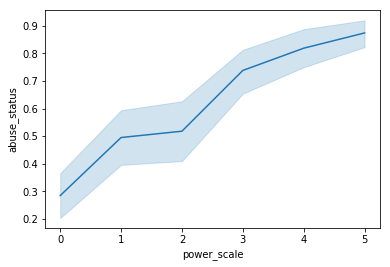

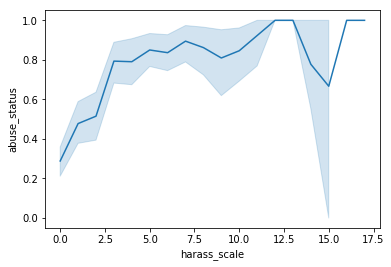

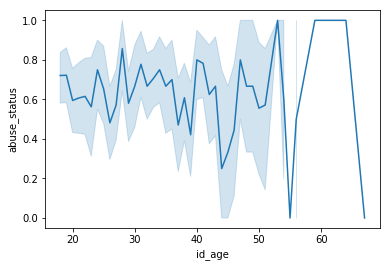

In [28]:
for feature in continuous_vars:
    sns.lineplot(x=feature, y='abuse_status', data=df)
    plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 45 columns):
id                              705 non-null int64
abuse_past_year                 705 non-null int64
abuse_status                    705 non-null int64
length_relationship             705 non-null int64
partner_abusive                 705 non-null int64
num_abusers                     705 non-null int64
num_children                    705 non-null int64
pregnant                        705 non-null int64
beaten_while_pregnant           705 non-null int64
support_score                   705 non-null int64
guns_in_home                    705 non-null int64
jealous_past_year               705 non-null int64
limit_family_contact            705 non-null int64
location_tracking               705 non-null int64
threat_hit                      705 non-null int64
thrown_object                   705 non-null int64
push_shove                      705 non-null int64
slap                        

In [30]:
df[df.abuse_past_year == 1][df.reassault == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 1 to 696
Data columns (total 45 columns):
id                              350 non-null int64
abuse_past_year                 350 non-null int64
abuse_status                    350 non-null int64
length_relationship             350 non-null int64
partner_abusive                 350 non-null int64
num_abusers                     350 non-null int64
num_children                    350 non-null int64
pregnant                        350 non-null int64
beaten_while_pregnant           350 non-null int64
support_score                   350 non-null int64
guns_in_home                    350 non-null int64
jealous_past_year               350 non-null int64
limit_family_contact            350 non-null int64
location_tracking               350 non-null int64
threat_hit                      350 non-null int64
thrown_object                   350 non-null int64
push_shove                      350 non-null int64
slap                        

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [31]:
def make_rel(df, x, y, hue):
    '''creates a relplot from a dataframe using two continuous and one categorical variable as hue'''
    sns.relplot(x=x,y=y, hue=hue, data = df)

In [32]:
continuous_vars

['length_relationship', 'power_scale', 'harass_scale', 'id_age']

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


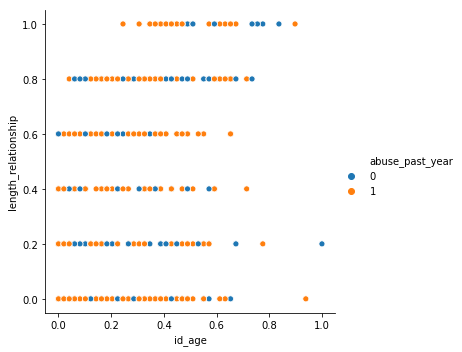

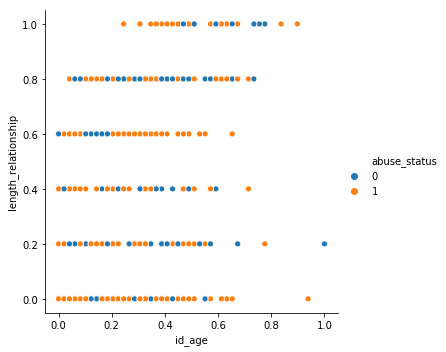

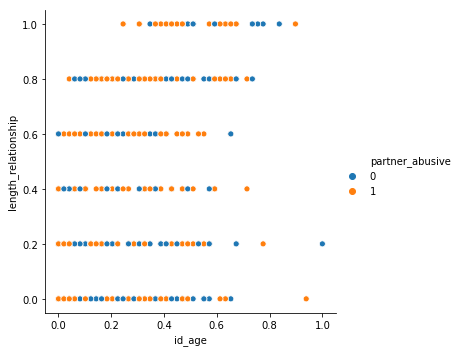

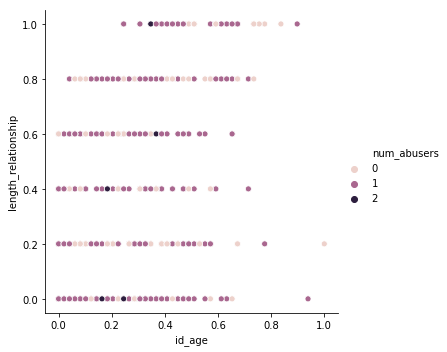

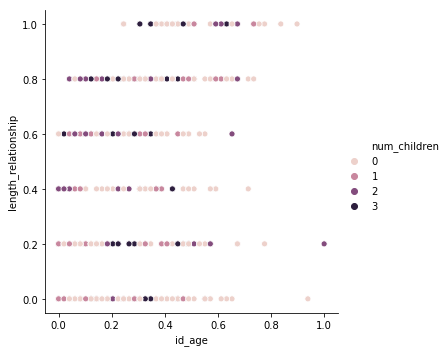

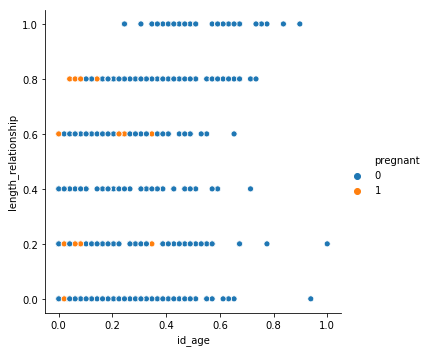

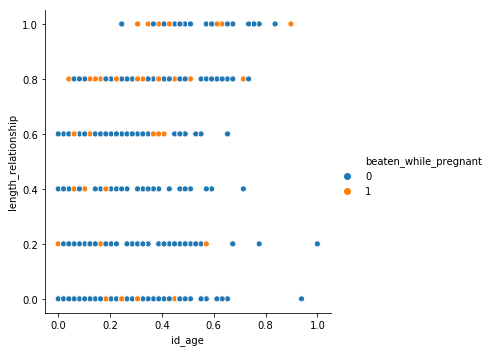

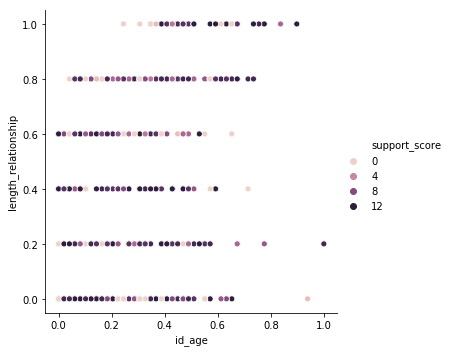

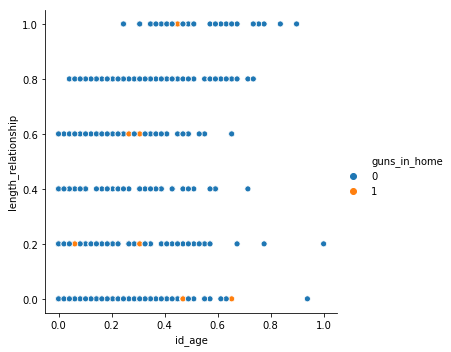

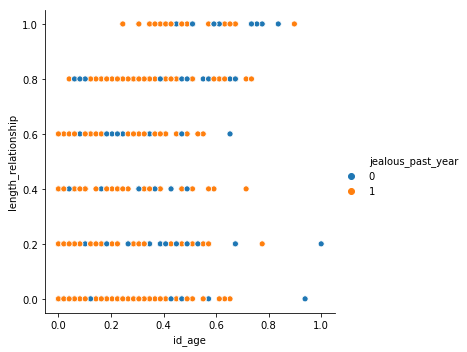

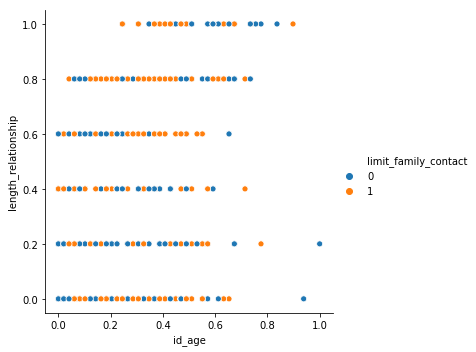

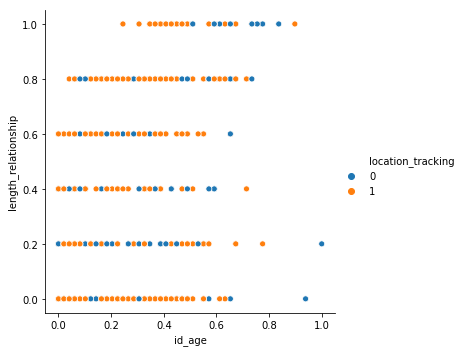

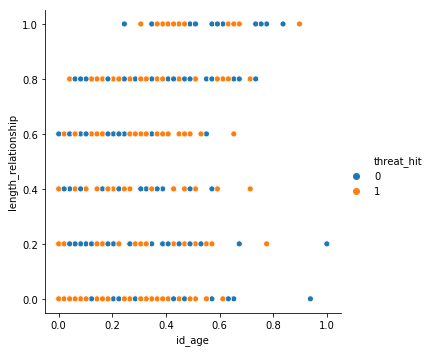

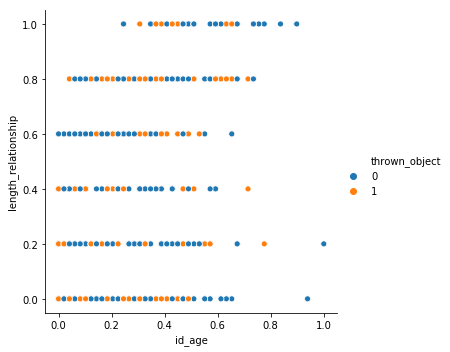

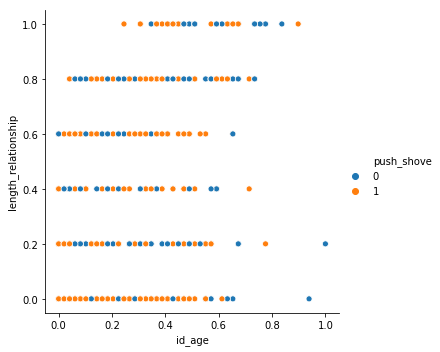

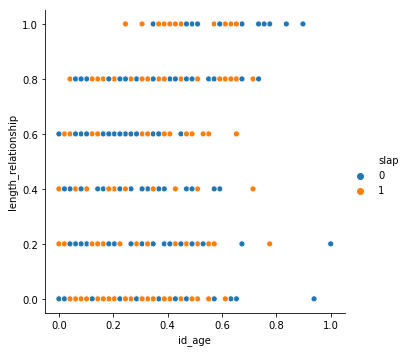

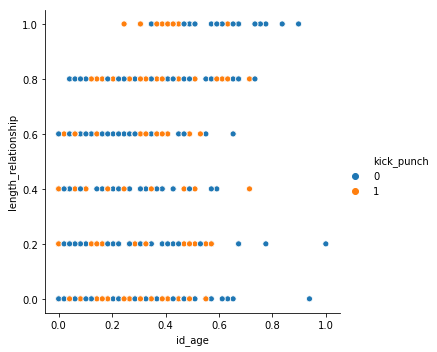

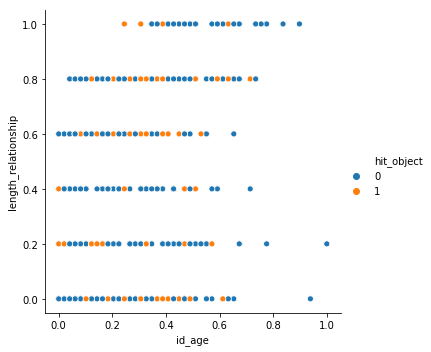

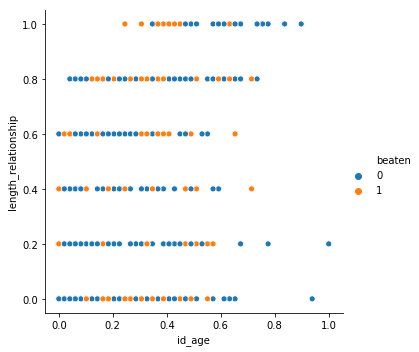

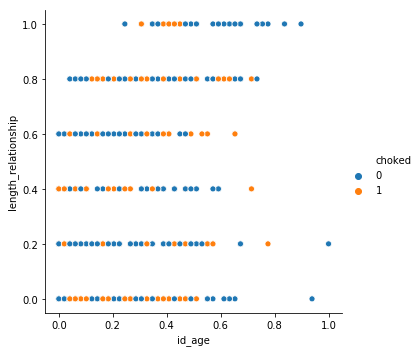

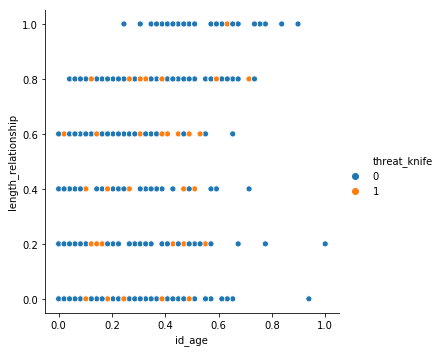

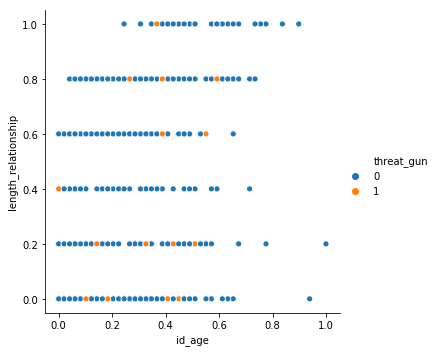

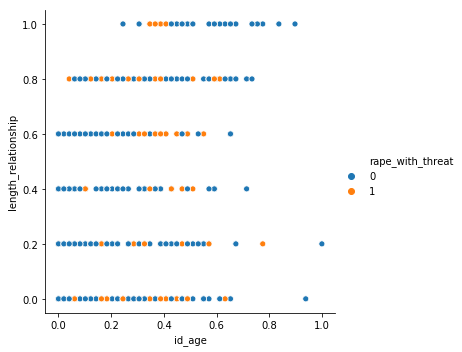

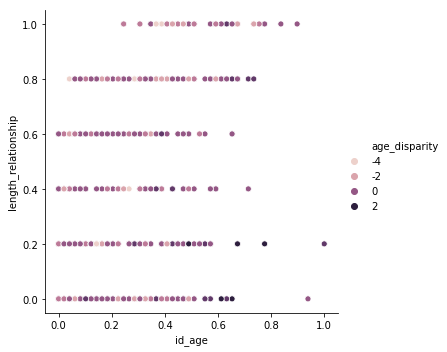

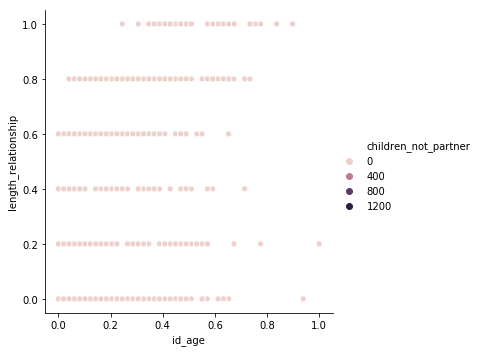

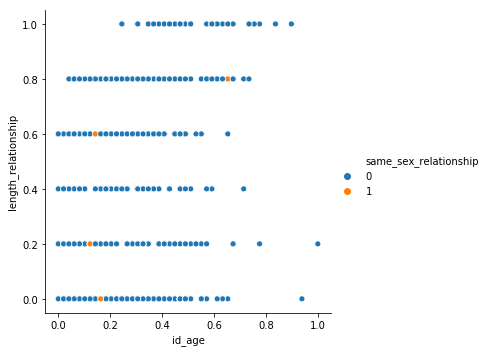

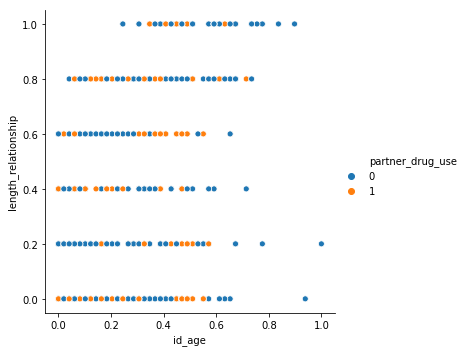

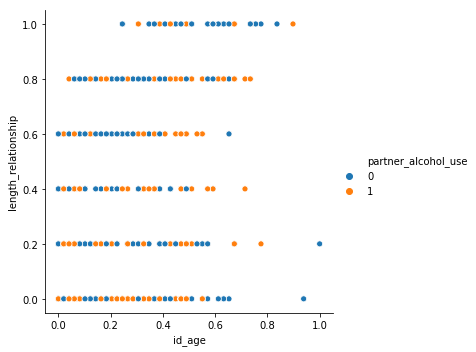

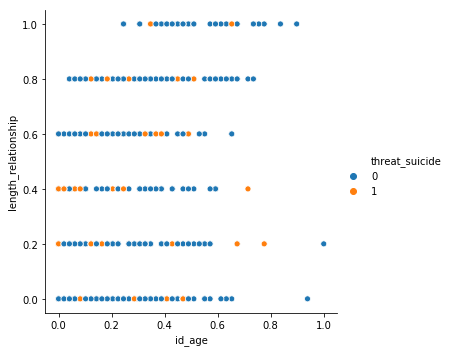

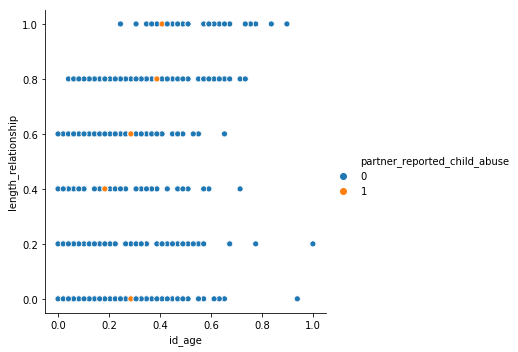

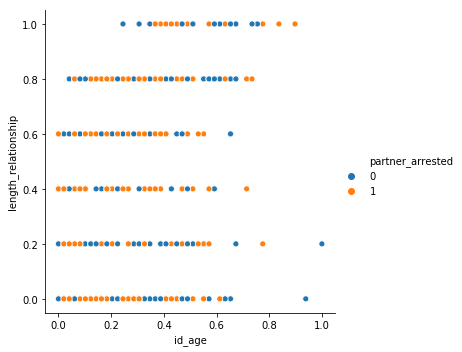

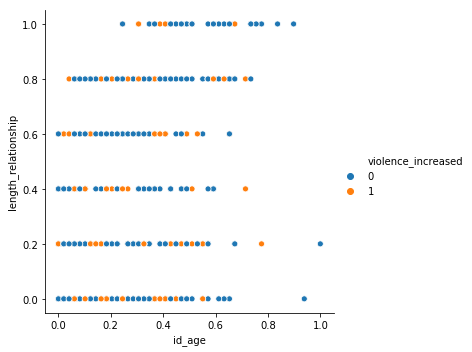

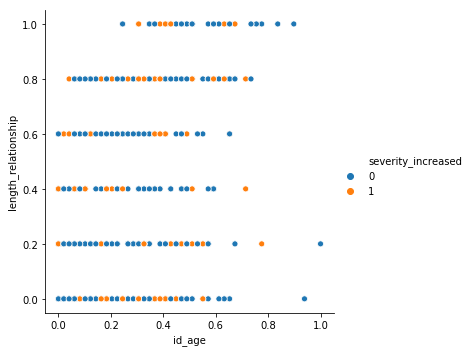

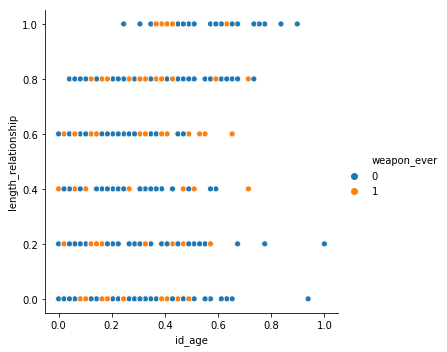

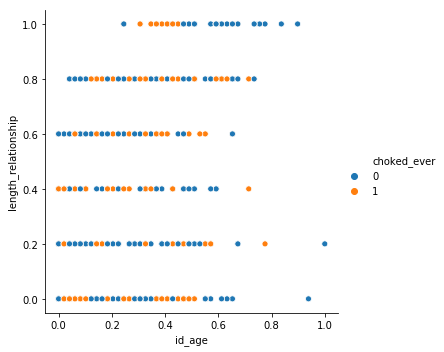

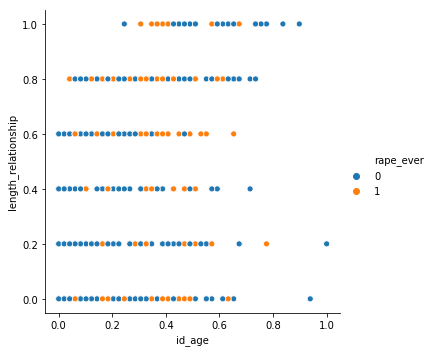

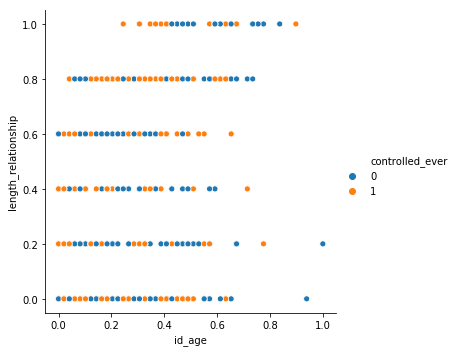

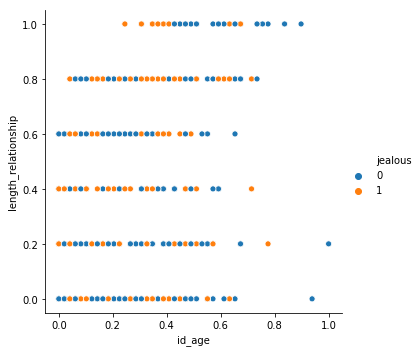

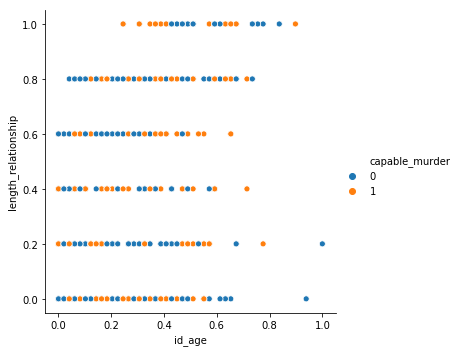

In [33]:
for feat in features:
    make_rel(train_df, 'id_age', 'length_relationship', feat)

In [2]:
def swarrrm(df, cat, num_vars):
    '''creates a series of swarm plots from a dataframe using a categorical variable and a list of continuous ones'''
    for i, col in enumerate(num_vars):
        i = i+1
        plt.figure(figsize=(len(num_vars)*2, 14))
        plt.subplot(len(num_vars), 1, i)
        sns.swarmplot(data=df, x=cat, y=col)

In [3]:
for cat in features:
    swarrrm(df, cat, continuous_vars)

NameError: name 'features' is not defined

## Testing initial explore.py functions:

In [63]:
import explore as exp

In [64]:
non_explicit_vars = ['num_children', 
                 'pregnant', 
                 'support_score', 
                 'guns_in_home', 
                 'jealous_past_year', 
                 'limit_family_contact',
                 'location_tracking', 
                 'threat_hit', 
                 'thrown_object', 
                 'threat_knife', 
                 'threat_gun', 
                 'age_disparity', 
                 'children_not_partner', 
                 'same_sex_relationship', 
                 'partner_drug_use', 
                 'partner_alcohol_use', 
                 'threat_suicide', 
                 'partner_reported_child_abuse', 
                 'partner_arrested', 
                 'controlled_ever', 
                 'jealous']

In [65]:
some_feats, some_dict = exp.get_chi_squared(train_df, non_explicit_vars)

pregnant
Dependent (reject H0)
-----------------------
support_score
Dependent (reject H0)
-----------------------
jealous_past_year
Dependent (reject H0)
-----------------------
limit_family_contact
Dependent (reject H0)
-----------------------
location_tracking
Dependent (reject H0)
-----------------------
threat_hit
Dependent (reject H0)
-----------------------
thrown_object
Dependent (reject H0)
-----------------------
threat_knife
Dependent (reject H0)
-----------------------
threat_gun
Dependent (reject H0)
-----------------------
partner_drug_use
Dependent (reject H0)
-----------------------
partner_alcohol_use
Dependent (reject H0)
-----------------------
threat_suicide
Dependent (reject H0)
-----------------------
partner_reported_child_abuse
Dependent (reject H0)
-----------------------
partner_arrested
Dependent (reject H0)
-----------------------
controlled_ever
Dependent (reject H0)
-----------------------
jealous
Dependent (reject H0)
-----------------------


In [66]:
some_dict

{'pregnant': 9.876378101646957,
 'support_score': 37.82346863486192,
 'jealous_past_year': 146.52146336721492,
 'limit_family_contact': 109.00616735626437,
 'location_tracking': 124.20863764771491,
 'threat_hit': 272.0257068695987,
 'thrown_object': 122.20755445381003,
 'threat_knife': 48.85290486341199,
 'threat_gun': 28.96320942578544,
 'partner_drug_use': 68.78344313554288,
 'partner_alcohol_use': 44.187629252717976,
 'threat_suicide': 35.91829241628727,
 'partner_reported_child_abuse': 4.922391365253009,
 'partner_arrested': 53.34931895198798,
 'controlled_ever': 185.7079042756635,
 'jealous': 184.41872593808932}

In [67]:
this_list = exp.sort_sigs(some_dict)

In [68]:
cont_list, cont_dict = exp.get_significant_t_tests(train_df, continuous_vars)

Feature analyzed: harass_scale
Comparing abused to non-abused: 
Our t-statistic is 15.67 and the p-value is 1.309796037e-46
----------
Feature analyzed: id_age
Comparing abused to non-abused: 
Our t-statistic is -2.011 and the p-value is 0.04477967339
----------


In [69]:
cont_list

['harass_scale', 'id_age']

In [70]:
new_list = []
for item in this_list:
    new_list.append(item[0])
for item in some_dict:
    new_list.append(item)
new_list

['threat_hit',
 'controlled_ever',
 'jealous',
 'jealous_past_year',
 'location_tracking',
 'thrown_object',
 'limit_family_contact',
 'partner_drug_use',
 'partner_arrested',
 'threat_knife',
 'partner_alcohol_use',
 'support_score',
 'threat_suicide',
 'threat_gun',
 'pregnant',
 'partner_reported_child_abuse',
 'pregnant',
 'support_score',
 'jealous_past_year',
 'limit_family_contact',
 'location_tracking',
 'threat_hit',
 'thrown_object',
 'threat_knife',
 'threat_gun',
 'partner_drug_use',
 'partner_alcohol_use',
 'threat_suicide',
 'partner_reported_child_abuse',
 'partner_arrested',
 'controlled_ever',
 'jealous']

In [71]:
for feat in features:
    pd.crosstab(train_df[feat], train_df.abuse_past_year, margins=True).style.background_gradient(cmap='YlOrRd')
    plt.show()

In [72]:
train_df[train_df.abuse_past_year ==1][train_df.age_disparity ==-3].age_disparity

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


590   -3
533   -3
526   -3
197   -3
414   -3
67    -3
537   -3
410   -3
520   -3
482   -3
Name: age_disparity, dtype: int64

In [73]:
train_df[train_df.abuse_past_year == 1].age_disparity

26     0
532    0
495   -2
565   -1
306    0
139    0
613    1
462    0
304    0
169    0
403   -1
541   -1
93     0
464    0
187   -2
605    2
395   -1
480    0
473   -1
540    0
17     0
694    0
262    0
612   -2
271    1
427    0
389    0
614   -1
45     0
516    0
      ..
135    0
691    0
634   -2
422    0
232    0
308   -2
471   -1
202   -2
55    -1
484    1
199    0
206    1
408   -1
230   -1
431    0
251   -2
3      0
186    0
195    1
246   -2
681   -1
177   -2
287   -1
175    0
313    0
285   -1
496    0
482   -3
391    0
300   -2
Name: age_disparity, Length: 420, dtype: int64

In [74]:
import scipy as sp 
import numpy as np
tstat, pval = sp.stats.ttest_ind(train_df[train_df.abuse_past_year == 1].age_disparity, train_df[train_df.abuse_past_year == 0].age_disparity)
print('Our t-statistic is {:.4} and the p-value is {:.10}'.format(tstat, pval))

Our t-statistic is -0.1745 and the p-value is 0.861537521


In [75]:
tstat, pval = sp.stats.ttest_ind(train_df[train_df.abuse_past_year == 1].id_age, train_df[train_df.abuse_past_year == 0].id_age)
print('Our t-statistic is {:.4} and the p-value is {:.10}'.format(tstat, pval))

Our t-statistic is -2.011 and the p-value is 0.04477967339


In [76]:
buildstr1 = r'train_df[train_df.abuse_past_year == 1].'
buildstr2 = r'train_df[train_df.abuse_past_year == 0].'
for feat in features:
    abused = buildstr1 + feat
    not_abused = buildstr2 + feat
    print(abused)

train_df[train_df.abuse_past_year == 1].abuse_past_year
train_df[train_df.abuse_past_year == 1].abuse_status
train_df[train_df.abuse_past_year == 1].partner_abusive
train_df[train_df.abuse_past_year == 1].num_abusers
train_df[train_df.abuse_past_year == 1].num_children
train_df[train_df.abuse_past_year == 1].pregnant
train_df[train_df.abuse_past_year == 1].beaten_while_pregnant
train_df[train_df.abuse_past_year == 1].support_score
train_df[train_df.abuse_past_year == 1].guns_in_home
train_df[train_df.abuse_past_year == 1].jealous_past_year
train_df[train_df.abuse_past_year == 1].limit_family_contact
train_df[train_df.abuse_past_year == 1].location_tracking
train_df[train_df.abuse_past_year == 1].threat_hit
train_df[train_df.abuse_past_year == 1].thrown_object
train_df[train_df.abuse_past_year == 1].push_shove
train_df[train_df.abuse_past_year == 1].slap
train_df[train_df.abuse_past_year == 1].kick_punch
train_df[train_df.abuse_past_year == 1].hit_object
train_df[train_df.abuse_past_yea

In [77]:
this_thing = 'train_df[train_df.abuse_past_year == 1].capable_murder'

In [78]:
def make_string(some_input):
    print(r(some_input))

In [79]:
def get_significant_t_tests(df, continuous_vars):
    '''Runs t-tests between two groups from a dataframe and a list of column names.
    If test results are noteworthy due to the t-statistic and p-value, results are printed'''
    some_feats = []
    train_df = df
    buildstr1 = r'train_df[train_df.abuse_past_year == 1].'
    buildstr2 = r'train_df[train_df.abuse_past_year == 0].'
    for feat in continuous_vars:
        abused = buildstr1 + feat
        not_abused = buildstr2 + feat
        tstat, pval = sp.stats.ttest_ind(eval(abused), eval(not_abused))
        if tstat > 1.96 or tstat < -1.96:
            if pval < 0.05:
                print(f'Feature analyzed: {feat}')
                print('Comparing abused to non-abused: ')
                print('Our t-statistic is {:.4} and the p-value is {:.10}'.format(tstat, pval))
                print('----------')
                some_feats.append(feat)
    return some_feats

In [80]:
some_feats = get_significant_t_tests(train_df, continuous_vars)

Feature analyzed: harass_scale
Comparing abused to non-abused: 
Our t-statistic is 15.67 and the p-value is 1.309796037e-46
----------
Feature analyzed: id_age
Comparing abused to non-abused: 
Our t-statistic is -2.011 and the p-value is 0.04477967339
----------


In [81]:
import scipy.stats as stats
sig_feats = []
sig_dict = {}
for feat in non_explicit_vars:
    tbl = pd.crosstab(train_df[feat], train_df['abuse_past_year'])
    stat, p, dof, expected = stats.chi2_contingency(tbl)
    prob = .95
    critical = stats.chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        if p < 0.05:
            sig_dict[feat] = abs(stat)
            print(feat)
            print('Dependent (reject H0)')
            print('-----------------------')
            sig_feats.append(feat)
    else:
        pass

pregnant
Dependent (reject H0)
-----------------------
support_score
Dependent (reject H0)
-----------------------
jealous_past_year
Dependent (reject H0)
-----------------------
limit_family_contact
Dependent (reject H0)
-----------------------
location_tracking
Dependent (reject H0)
-----------------------
threat_hit
Dependent (reject H0)
-----------------------
thrown_object
Dependent (reject H0)
-----------------------
threat_knife
Dependent (reject H0)
-----------------------
threat_gun
Dependent (reject H0)
-----------------------
partner_drug_use
Dependent (reject H0)
-----------------------
partner_alcohol_use
Dependent (reject H0)
-----------------------
threat_suicide
Dependent (reject H0)
-----------------------
partner_reported_child_abuse
Dependent (reject H0)
-----------------------
partner_arrested
Dependent (reject H0)
-----------------------
controlled_ever
Dependent (reject H0)
-----------------------
jealous
Dependent (reject H0)
-----------------------


In [82]:
sig_dict

{'pregnant': 9.876378101646957,
 'support_score': 37.82346863486192,
 'jealous_past_year': 146.52146336721492,
 'limit_family_contact': 109.00616735626437,
 'location_tracking': 124.20863764771491,
 'threat_hit': 272.0257068695987,
 'thrown_object': 122.20755445381003,
 'threat_knife': 48.85290486341199,
 'threat_gun': 28.96320942578544,
 'partner_drug_use': 68.78344313554288,
 'partner_alcohol_use': 44.187629252717976,
 'threat_suicide': 35.91829241628727,
 'partner_reported_child_abuse': 4.922391365253009,
 'partner_arrested': 53.34931895198798,
 'controlled_ever': 185.7079042756635,
 'jealous': 184.41872593808932}

In [83]:
import operator
val_list = []
for key in sig_dict:
    val_list.append(sig_dict[key])
sorted_vals = sorted(sig_dict.items(), key=operator.itemgetter(1), reverse=True) 
sorted_vals

[('threat_hit', 272.0257068695987),
 ('controlled_ever', 185.7079042756635),
 ('jealous', 184.41872593808932),
 ('jealous_past_year', 146.52146336721492),
 ('location_tracking', 124.20863764771491),
 ('thrown_object', 122.20755445381003),
 ('limit_family_contact', 109.00616735626437),
 ('partner_drug_use', 68.78344313554288),
 ('partner_arrested', 53.34931895198798),
 ('threat_knife', 48.85290486341199),
 ('partner_alcohol_use', 44.187629252717976),
 ('support_score', 37.82346863486192),
 ('threat_suicide', 35.91829241628727),
 ('threat_gun', 28.96320942578544),
 ('pregnant', 9.876378101646957),
 ('partner_reported_child_abuse', 4.922391365253009)]

In [84]:
sig_feats

['pregnant',
 'support_score',
 'jealous_past_year',
 'limit_family_contact',
 'location_tracking',
 'threat_hit',
 'thrown_object',
 'threat_knife',
 'threat_gun',
 'partner_drug_use',
 'partner_alcohol_use',
 'threat_suicide',
 'partner_reported_child_abuse',
 'partner_arrested',
 'controlled_ever',
 'jealous']

In [85]:
some_feats

['harass_scale', 'id_age']

In [86]:
sig_feats = sig_feats + some_feats

In [87]:
sig_feats

['pregnant',
 'support_score',
 'jealous_past_year',
 'limit_family_contact',
 'location_tracking',
 'threat_hit',
 'thrown_object',
 'threat_knife',
 'threat_gun',
 'partner_drug_use',
 'partner_alcohol_use',
 'threat_suicide',
 'partner_reported_child_abuse',
 'partner_arrested',
 'controlled_ever',
 'jealous',
 'harass_scale',
 'id_age']

In [88]:
abuse_past_year()

NameError: name 'abuse_past_year' is not defined

In [93]:
def make_bars(df, metric, features):
    _, ax = plt.subplots(nrows=len(features), ncols=1, figsize=(15, (11*len(features))))
    train_df = df
    buildstr1 = r'train_df.' + metric + r'.mean()'
    rate = eval(buildstr1)
    status = metric + '_status'
    for i, feature in enumerate(features):
        sns.barplot(feature, metric, data=train_df, ax=ax[i], alpha=.5)
        ax[i].set_ylabel(metric)
        ax[i].axhline(rate, ls='--', color='grey')

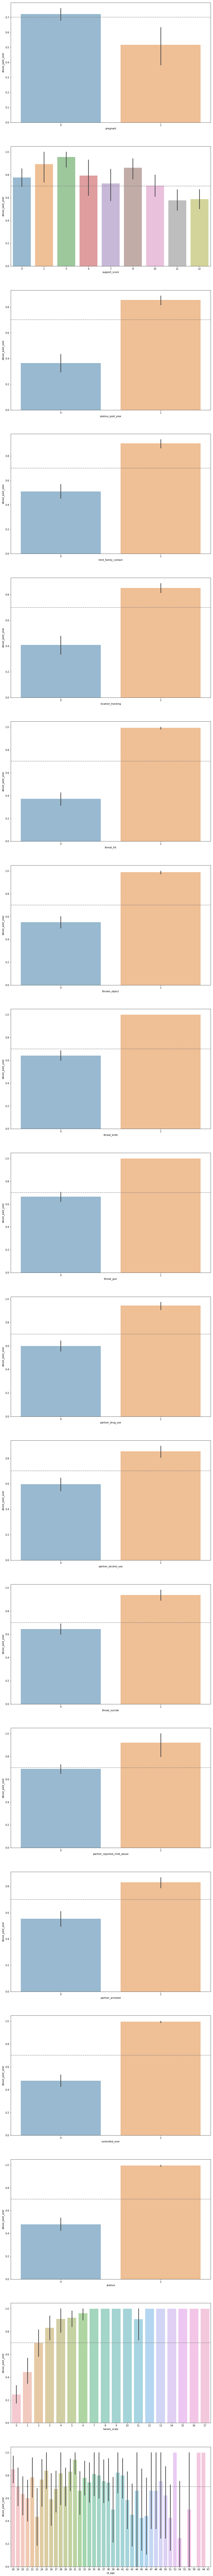

In [94]:
make_bars(train_df, 'abuse_past_year', sig_feats)